#                                     **Credit Fraud Detector**

**Note**: This project is part of a series of hands-on projects that I am working on as part of my journey to becoming a data scientist. The goal of this series is to learn new skills and techniques by doing real-world projects, and to make the process of data science more clear and understandable for others. I will be sharing my progress on this project and other projects in the series

### **Introduction:**
In this project, we will use various predictive models to detect fraud in credit card transactions. The dataset is publicly available and the features are scaled but the names are not shown due to privacy reasons. We will clean and prepare the data, explore it, build and train predictive models, evaluate their performance, and discuss the limitations and how to improve them in the future. The goal is to learn how to use predictive models to detect fraud and to become better data scientists.

### **Data Science Methodology:**

1. Problem definition
1. Data collection
1. Data preparation
1. Data exploration
1. Modeling
1. Evaluation
1. Communication


### **Our Goal:**
* Understand the distribution of the data
* Determine the classifiers that will be used and decide which one has a higher accuracy
* Use Machine Learning and Deep learning techniques for find best classifier
* Communicated with team for visualization

## **1. Problem definition:**
<br>
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
</br>

In [1]:
pip install --upgrade tensorflow-io


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 28.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.31.0
    Uninstalling tensorflow-io-gcs-filesystem-0.31.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.31.0
  Attempting uninstall: tensorflow-io
    Found existing installation: tensorflow-io 0.31.0
    Uninstalling tensorflow-io-0.31.0:
      Successfully uninstalled tensorflow-io-0.31.0
Note: you may need to restart the kernel to use updated packages.


## **Import required packages**

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries\
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


## **2. Data collection:**
<br>
Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.
</br>


 **Acknowledgements:**
 <br>
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
</br>

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(df.isnull().sum().max())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
amount_mean = df['Amount'].mean().round(2)
print("Amount of money on average per transactions:" , amount_mean, " EUR")

Amount of money on average per transactions: 88.35  EUR


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# Ratio of Frauds and Non- Frauds data
print('Non-Frauds', round(df['Class'].value_counts()[0]/len(df)* 100,2),"% of the dataset")
print('Frauds', round(df['Class'].value_counts()[1]/len(df)* 100,2),"% of the dataset")

Non-Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Note**: Dataset is so imbalanced. As if we trained our model with imbalanced dataset, our model will get to be biased in Non-Frauds and makes the model to be overfitting.

**Referece:**
<br>
* Japkowicz, N., & Stephen, S. (2002). The class imbalance problem: A systematic study. Intelligent Data Analysis, 6(5), 429-449.<br>
* Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic minority over-sampling technique. Journal of artificial intelligence research, 16, 321-357.<br>
* García, S., Fernández, A., Luengo, J., & Herrera, F. (2010). Advanced nonparametric tests for multiple comparisons in the design of experiments in computational intelligence and data mining: Experimental analysis of power. Information Sciences, 180(10), 2044-2064

**What did we know from here**
* We know that dataset is imbalanced as it contained much more Non- Frauds than Fruads
* We know that average amount of transaction is 88.35  EUR
* As if the dataset is imbalanced, in data preparation we need to see the data visualization to see how imbalanced it is

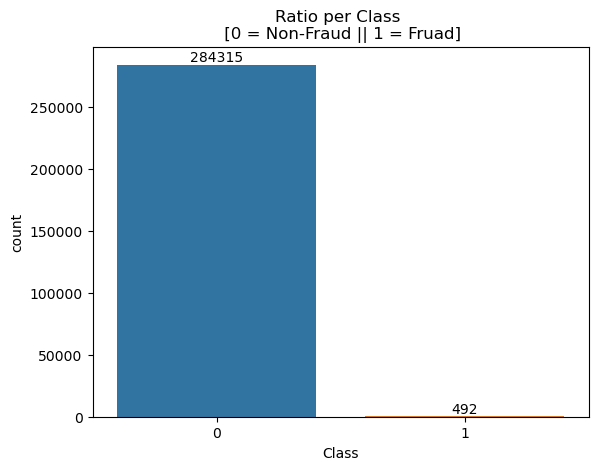

In [9]:
ax = sns.countplot(x=df['Class'])
plt.title("Ratio per Class \n [0 = Non-Fraud || 1 = Fruad]")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

**Note:** After seeing the graph show the distribution of data, we get to know an intel about how skewed data is. There are plenty of technique which will help us dealing with them.

## **Distribution:**

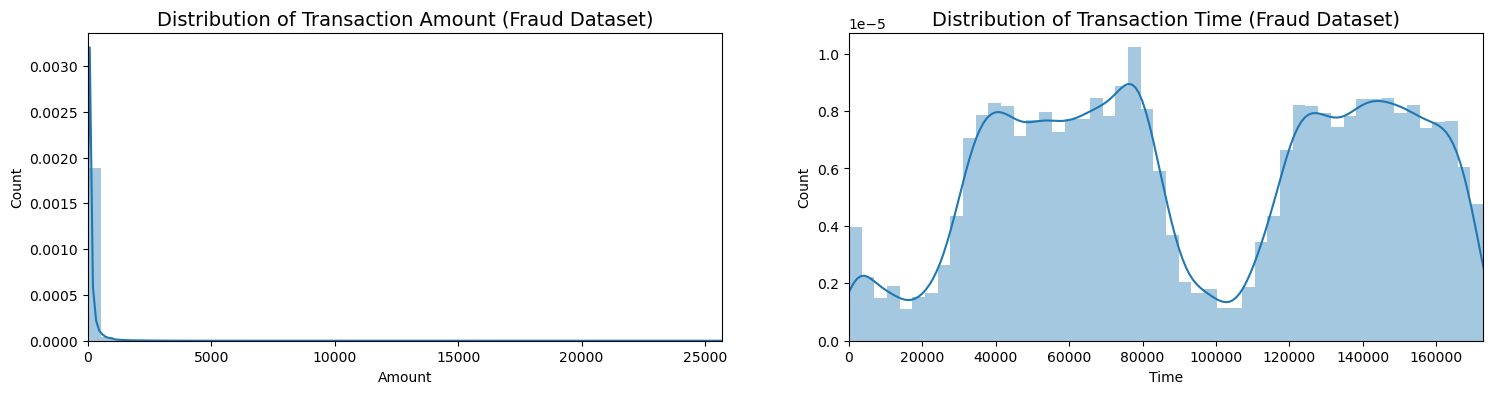

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0],kde=True)
ax[0].set_title('Distribution of Transaction Amount (Fraud Dataset)', fontsize=14)
ax[0].set_xlabel('Amount')
ax[0].set_ylabel('Count')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1],kde=True)
ax[1].set_title('Distribution of Transaction Time (Fraud Dataset)', fontsize=14)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Count')
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

**NOTE:** Visualizing the distribution of data is important because it provides valuable insights into the underlying patterns and characteristics of the dataset. <br>
##### Here are a few reasons why it is useful to examine the distribution:<br>
* **Understanding the data range**: By visualizing the distribution, you can get a sense of the range of values present in the dataset. This helps you identify outliers, extreme values, or unexpected patterns that may require further investigation. It provides a high-level overview of the data's spread and can help you detect any anomalies.

* **Identifying data skewness**: The distribution plot can reveal whether the data is symmetric or skewed. Skewness indicates that the data is not evenly distributed around the mean. Understanding the skewness is crucial because it can impact the choice of appropriate statistical techniques or machine learning algorithms. For example, if the data is heavily skewed, you may need to consider applying transformations to make it more symmetric before modeling.

* **Detecting data modality**: Visualization of the distribution can help identify whether the data has multiple modes (peaks) or exhibits a unimodal (single peak) pattern. This information can be useful in understanding the underlying patterns in the data and can guide decision-making in subsequent analysis steps.

* **Choosing appropriate statistical tests**: The shape of the distribution can guide the selection of appropriate statistical tests or techniques. For instance, normality assumptions are often required for certain statistical tests, and visualizing the distribution can help assess whether those assumptions hold. If the data deviates significantly from normality, alternative tests or transformations may be needed.

* **Data preprocessing**: Understanding the distribution can guide data preprocessing steps. For example, if the data is heavily skewed, you may need to apply transformations (such as log-transform) to make it more normally distributed. Additionally, visualization can help you decide on appropriate binning strategies or scaling methods based on the data's distribution.

**3. Data preparation**:
<br>
* **Data cleaning**: This step involves identifying and correcting errors in the data, such as missing values, incorrect data types, and duplicate records.
<br>
* **Data formatting**: This step involves transforming the data into a format that is compatible with the analysis tools that will be used. This may involve converting data types, merging or splitting dataframes, and creating new features.<br>
* **Data normalization**: This step involves adjusting the values of the data so that they have a common scale. This is important for some machine learning algorithms, such as linear regression and logistic regression.<br>
* **Data balancing**: This step involves addressing any imbalance in the data, such as when there are more observations of one class than another. This can be done by oversampling the minority class or undersampling the majority class.<br>
* **Data visualization**: This step involves creating visualizations of the data to help understand the data and identify any potential problems.
</br>

#### **Scaling and Distributing:**<br>
* **Time and amount should be scaled** in the same way as the other columns. This is necessary to ensure that all of the features in the dataset are on the same scale, which will help the machine learning algorithms to learn more effectively.<br><br>
* **We also need to create a subsample of the dataframe** that contains an equal number of fraud and non-fraud cases. This is because the machine learning algorithms will learn better if they are trained on a balanced dataset. By creating a subsample of the dataframe, we can ensure that there are an equal number of examples of both fraud and non-fraud cases, which will help the algorithms to better understand the patterns that distinguish between the two.<br>

##### **KEY TO KNOW:**
* **Why is it important to scale the time and amount columns?** Scaling the time and amount columns ensures that all of the features in the dataset are on the same scale, which will help the machine learning algorithms to learn more effectively. This is because the algorithms will be able to focus on the relative importance of each feature, rather than the absolute values of the features.
* **Why is it important to create a subsample of the dataframe with an equal number of fraud and non-fraud cases?** Creating a subsample of the dataframe with an equal number of fraud and non-fraud cases ensures that the machine learning algorithms are trained on a balanced dataset. This is important because it helps the algorithms to learn the patterns that distinguish between fraud and non-fraud cases more effectively. If the dataset is not balanced, the algorithms may learn to overfit the majority class (non-fraud cases), which will lead to poor performance on the minority class (fraud cases) or underfitting.

##### **Summary:**
* We need to scaled values in columns of amount and time as "**Scaled time**" and "**Scaled amount**".
* As the dataset containing **492 fraud cases**, we can **randomly select 492 cases of non-frauds** to create our new sub dataframe.
* After that we need to concatenate both fraud and randomly non-fraud and **create new sub-sample**.

##### **Scaling:**

In [11]:
rob_scaler = RobustScaler()
scaled_amount = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
scaled_time = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


###### **Splitting the original dataframe**
Before we can use the **random undersampling technique**, we need to separate the original dataframe. This is because we want to test our models on the original testing set, not on the testing set that is created by the random undersampling technique.

The reason for this is that the random undersampling technique will change the distribution of the data, and we want to make sure that we are testing our models on a dataset that is representative of the real world.

###### **Why is this important?**
The main goal of machine learning is to build models that can generalize well to new data. This means that we want our models to be able to make accurate predictions on data that they have not seen before.

**If we test our models on the testing set that is created by the random undersampling technique**, then we are not really testing how well they generalize to new data. This is because the testing set will have a different distribution than the real world data.

**What is the solution?**
The solution is to separate the original dataframe into two parts: a training set and a testing set. We will use the training set to train our models, and we will use the testing set to test our models.

The training set should be a representative sample of the real world data. This means that it should have the same distribution as the real world data.

The testing set should not be used to train the models. It should only be used to test the models. This will ensure that we are testing our models on data that they have not seen before, and that we are getting an accurate assessment of their performance.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

# Display the class distribution
class_distribution = df['Class'].value_counts(normalize=True) * 100
print('No Frauds: {:.2f}% of the dataset'.format(class_distribution[0]))
print('Frauds: {:.2f}% of the dataset'.format(class_distribution[1]))
print('-' * 100)

# Separate the features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Perform stratified train-test split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "\nTest:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Convert to arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Check the distribution of the labels in train and test sets
train_label_distribution = np.bincount(y_train) / len(y_train)
test_label_distribution = np.bincount(y_test) / len(y_test)
print('Label Distributions:')
print('Train:', train_label_distribution)
print('Test:', test_label_distribution)

No Frauds: 99.83% of the dataset
Frauds: 0.17% of the dataset
----------------------------------------------------------------------------------------------------
Train: [265518 180305  42664 ...  29062  13766  17677] 
Test: [263020  11378 147283 ... 274532 269819  64170]
Label Distributions:
Train: [0.99827075 0.00172925]
Test: [0.99827955 0.00172045]


**Random under-sampling:**<br>
A technique for dealing with imbalanced datasets. It works by randomly removing samples from the majority class until the class distribution is more balanced.<br><br>
**Our case scenario:**<br>
* As shown in the data visualization above, there are 492 fraud transactions. This information can be used to determine how many non-fraud transactions we need to bring the total number of transactions to 492, for a 50/50 ratio.
* After implementing this technique, we have a subsample of our dataframe with a 50/50 ratio with respect to our classes. The next step we will implement is to randomize the data to see if our models can maintain a certain accuracy each time we run this script.
<br>

**Note**: Random under-sampling is a technique that can be used to balance the classes in a dataset. However, it is important to note that this technique can also lead to information loss. For example, if you have a dataset with 284,315 non-fraud transactions and 492 fraud transactions, and you randomly undersample the non-fraud transactions to match the number of fraud transactions, you will lose a lot of information about the non-fraud transactions. This can lead to your classification models not performing as accurately as you would like.

In [14]:
# Shuffle the entire DataFrame
df = df.sample(frac=1, random_state=42)

# Select the fraud and non-fraud classes
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0][:len(fraud_df)]

# Concatenate the fraud and non-fraud samples
new_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle the concatenated DataFrame
new_df = new_df.sample(frac=1, random_state=42)

print(new_df.info())
new_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 146884 to 149869
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scaled_amount  984 non-null    float64
 1   scaled_time    984 non-null    float64
 2   V1             984 non-null    float64
 3   V2             984 non-null    float64
 4   V3             984 non-null    float64
 5   V4             984 non-null    float64
 6   V5             984 non-null    float64
 7   V6             984 non-null    float64
 8   V7             984 non-null    float64
 9   V8             984 non-null    float64
 10  V9             984 non-null    float64
 11  V10            984 non-null    float64
 12  V11            984 non-null    float64
 13  V12            984 non-null    float64
 14  V13            984 non-null    float64
 15  V14            984 non-null    float64
 16  V15            984 non-null    float64
 17  V16            984 non-null    float64
 18  V1

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
146884,-0.293579,0.038170,2.054361,-0.122642,-1.245717,0.189567,0.132497,-0.620765,0.059581,-0.148058,...,-0.209856,-0.271204,-0.687048,0.271569,-0.497120,-0.270115,0.208619,-0.076075,-0.075428,0
95597,18.615944,-0.226824,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,...,-0.447039,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1
96768,1.872424,-0.220456,0.955253,-0.833374,0.847147,0.725970,-1.322868,-0.238842,-0.565347,0.022443,...,-0.294785,-0.110554,-0.129397,-0.040892,0.364872,0.204756,-0.304578,0.055908,0.062489,0
75511,2.080905,-0.335930,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,...,0.270459,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,1
255556,-0.296653,0.852830,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,...,0.562030,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,1


#### Equally Distributing and Correlating:
With the dataframe now balanced, we can proceed to conduct a more in-depth analysis and perform data preprocessing.


Distribution of new dataset
0    0.5
1    0.5
Name: Class, dtype: float64


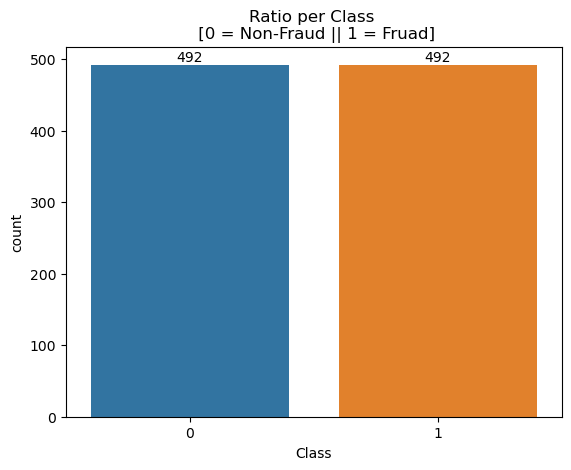

In [15]:
print('Distribution of new dataset')
print(new_df['Class'].value_counts()/len(new_df))


ax = sns.countplot(x=new_df['Class'])
plt.title("Ratio per Class \n [0 = Non-Fraud || 1 = Fruad]")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### **Correlation Matric**
Showing the correlation coefficients between different variables in a dataset. The correlation coefficient is a measure of the strength of the linear relationship between two variables. A correlation coefficient of +1 indicates a perfect positive correlation, a correlation coefficient of -1 indicates a perfect negative correlation, and a correlation coefficient of 0 indicates no correlation.<br>
**why we need correlation matrices in data preprocessing?**<br>
* **Identify correlated variables**: By identifying correlated variables, you can reduce the number of features in your dataset. This can help to improve the accuracy of your machine learning models.
* **Identify redundant variables**: If two variables are perfectly correlated, then one of the variables is redundant. This means that you can remove one of the variables from your dataset without affecting the accuracy of your machine learning models.
* **Identify noisy variables**: Noisy variables are variables that are not correlated with the target variable. These variables can be removed from your dataset without affecting the accuracy of your machine learning models.

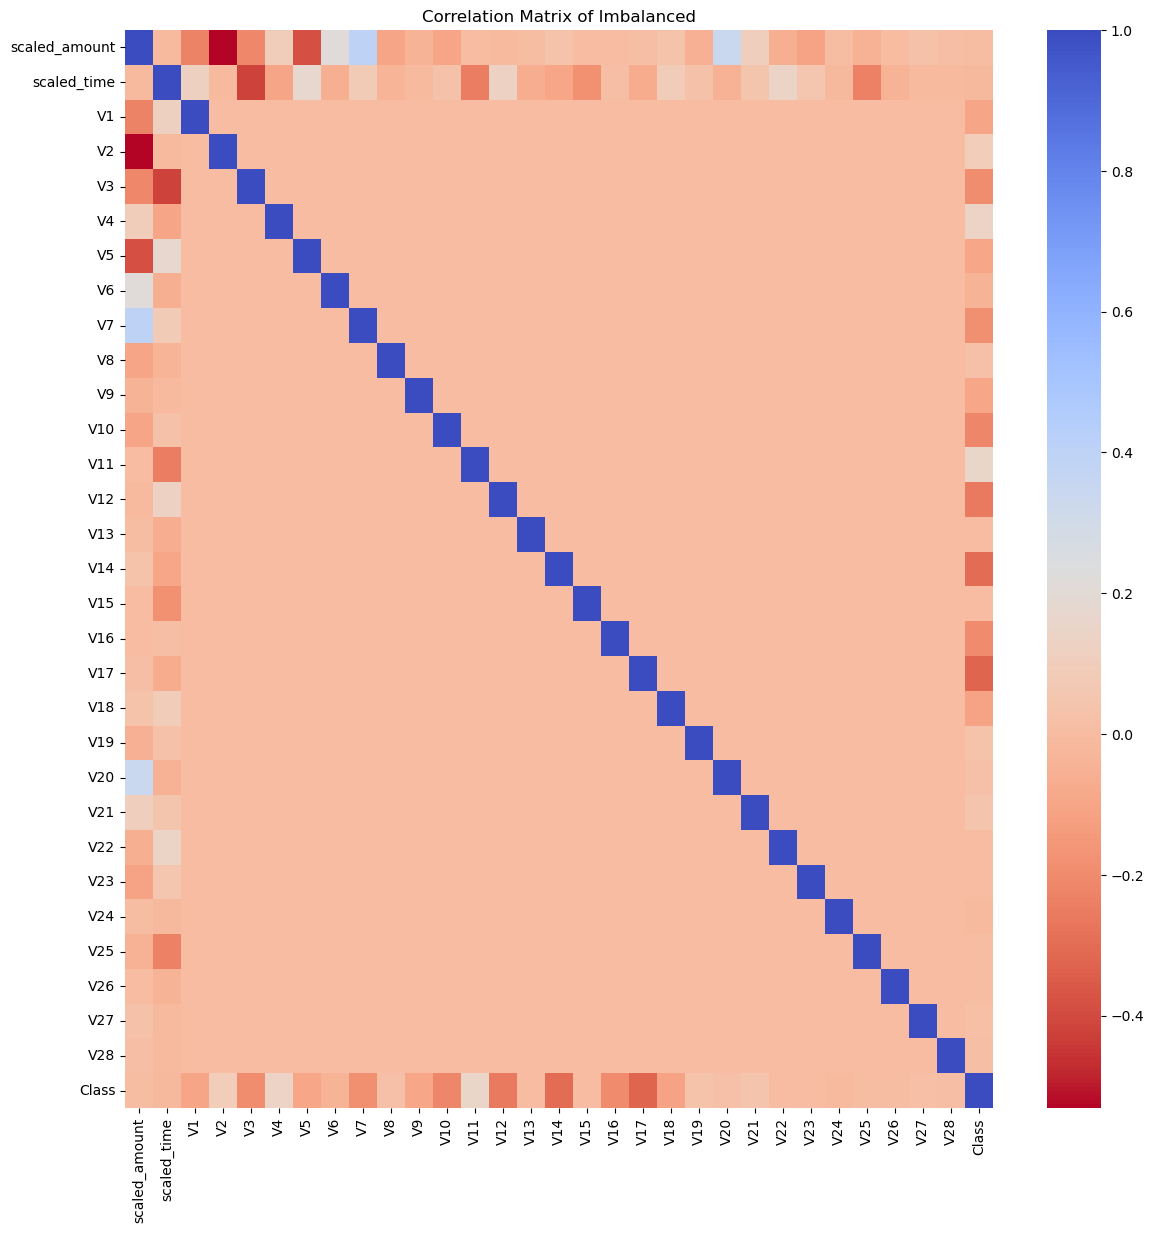

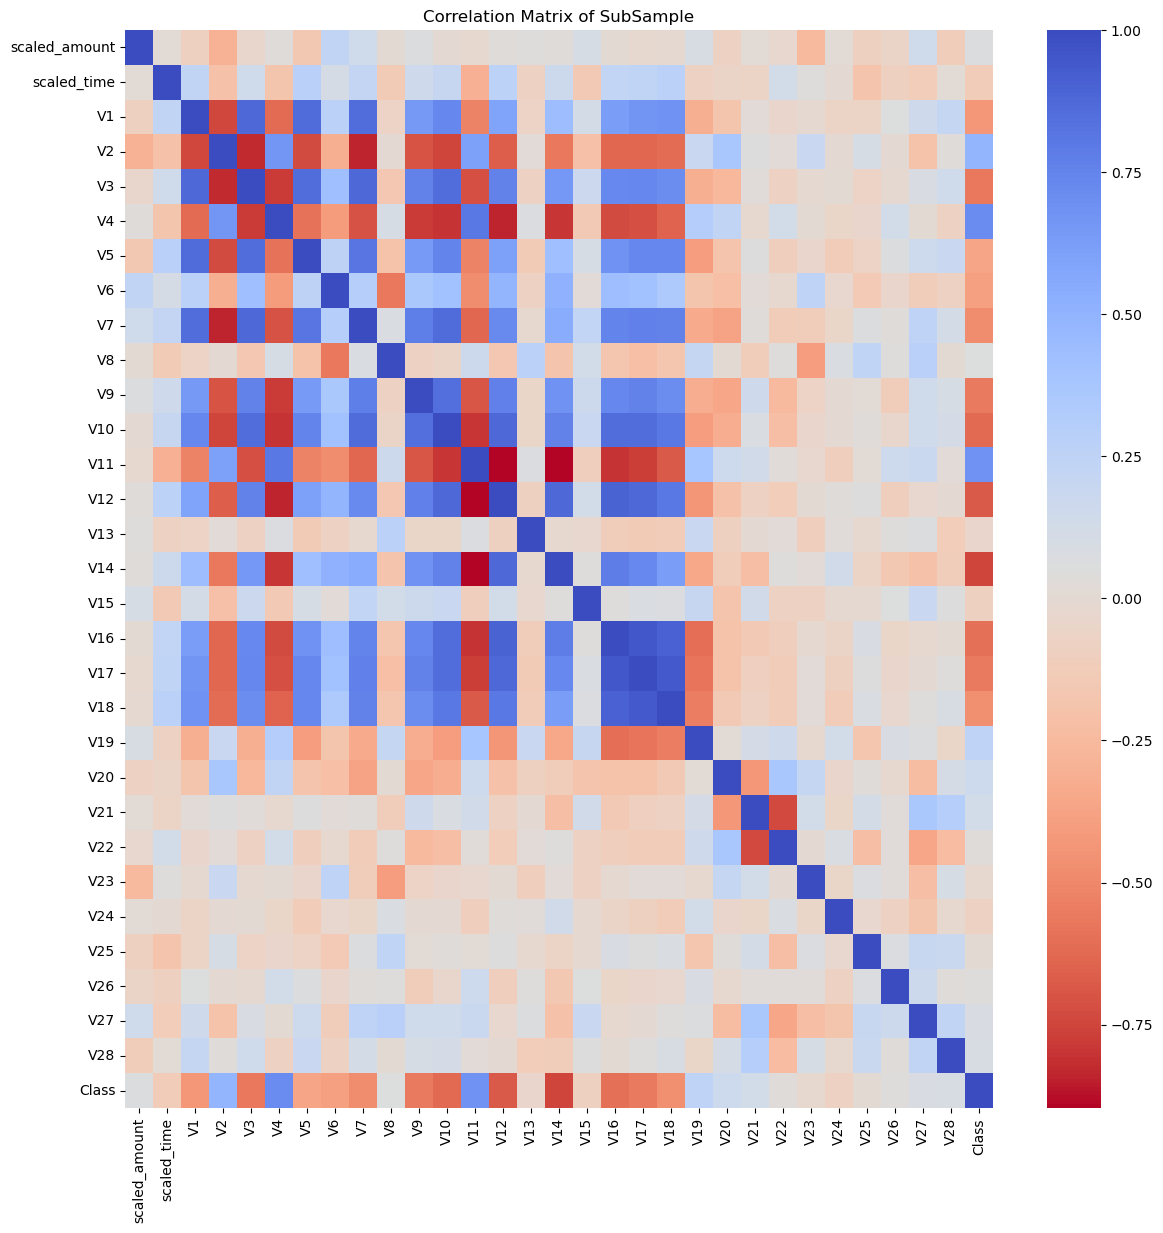

In [16]:
plt.figure(figsize=(14, 14))
df_corr = df.select_dtypes('number').corr()
ax1 = sns.heatmap(df_corr, cmap="coolwarm_r", annot_kws={'size': 20})
ax1.set_title("Correlation Matrix of Imbalanced")
plt.show()
plt.figure(figsize=(14, 14))
df_corr = new_df.select_dtypes('number').corr()
ax2 = sns.heatmap(df_corr, cmap="coolwarm_r", annot_kws={'size': 20})
ax2.set_title("Correlation Matrix of SubSample")
plt.show()

**Key to take:** To state the different of data after subsample and scaled. Get the detail of correlated data.

In [17]:
high_corr_mask = (df_corr.abs() > 0.8)

# Set non-high and non-low correlations to NaN
df_corr_filtered = df_corr.where(high_corr_mask)

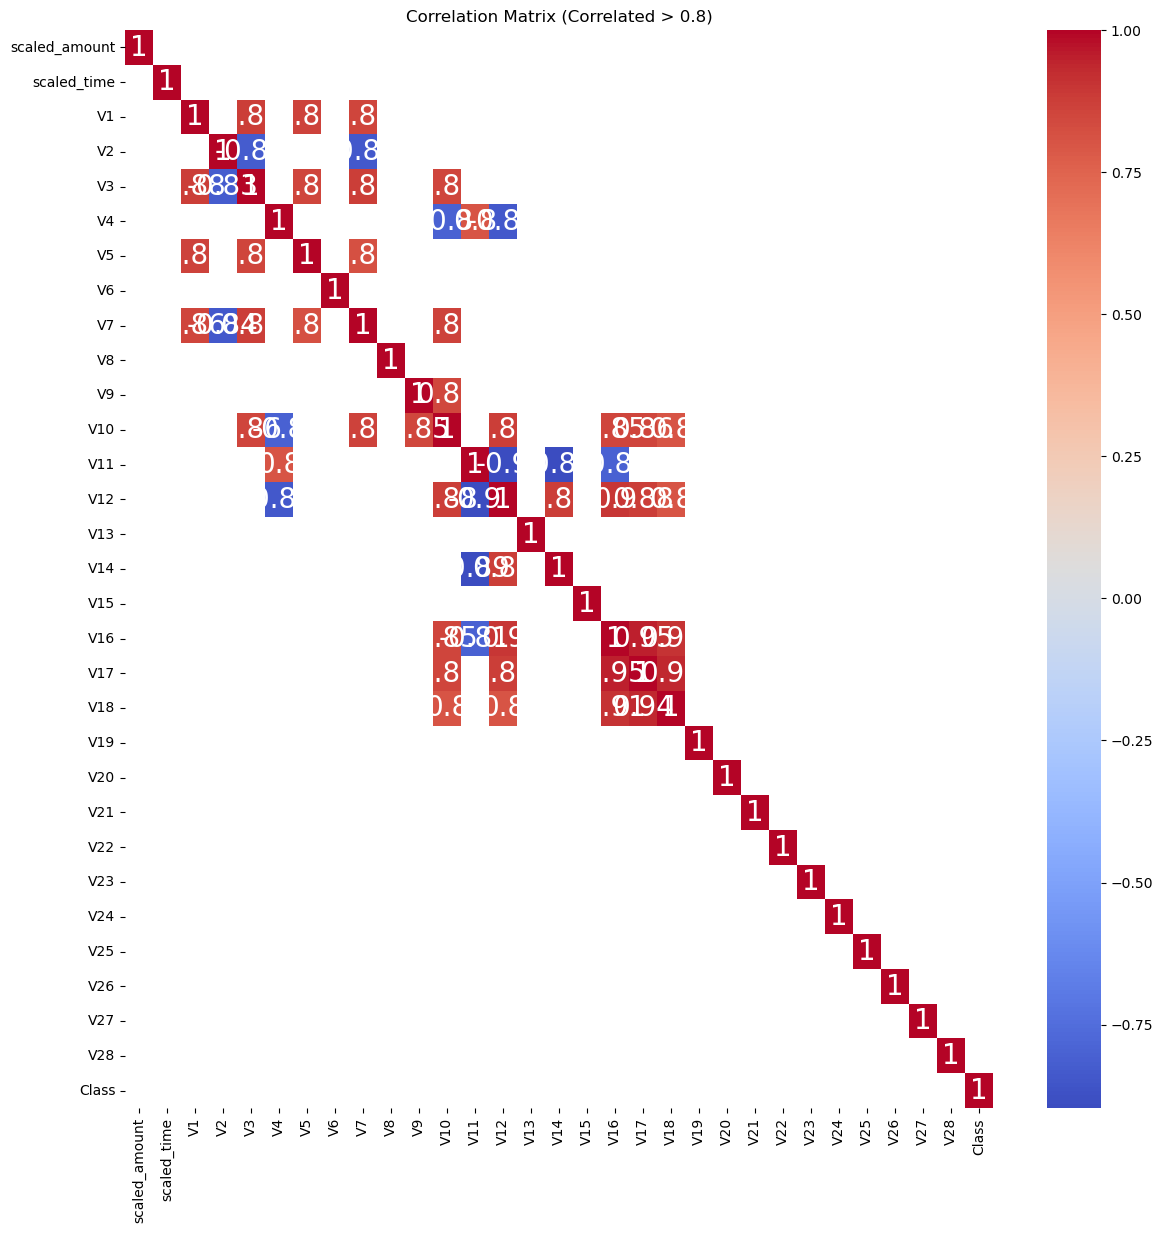

In [18]:
plt.figure(figsize=(14, 14))
ax3 = sns.heatmap(df_corr_filtered,annot=True, cmap="coolwarm", annot_kws={'size': 20})
ax3.set_title("Correlation Matrix (Correlated > 0.8)")
plt.show()

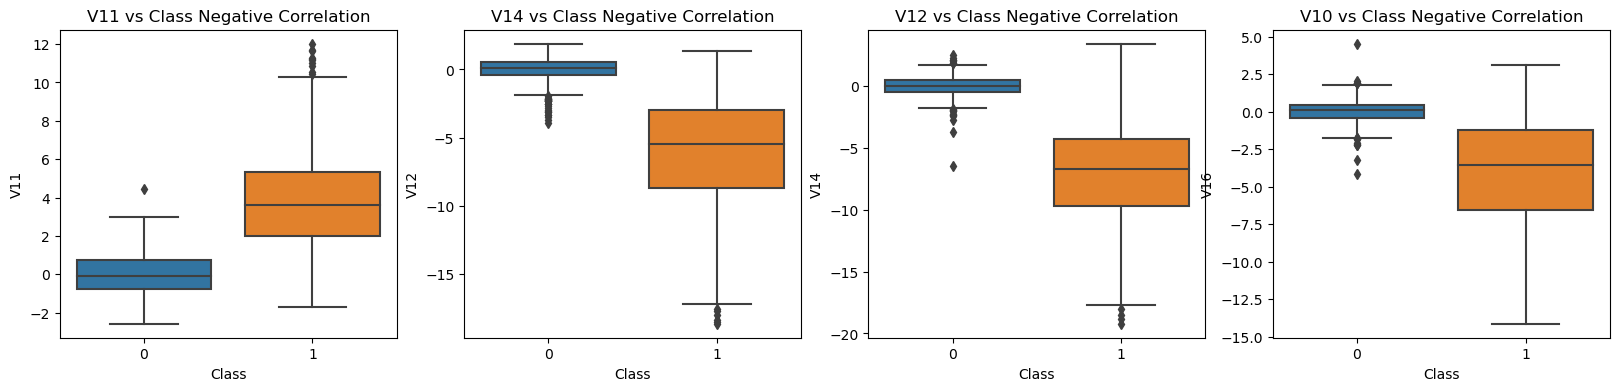

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[0])
axes[0].set_title('V11 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V16", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

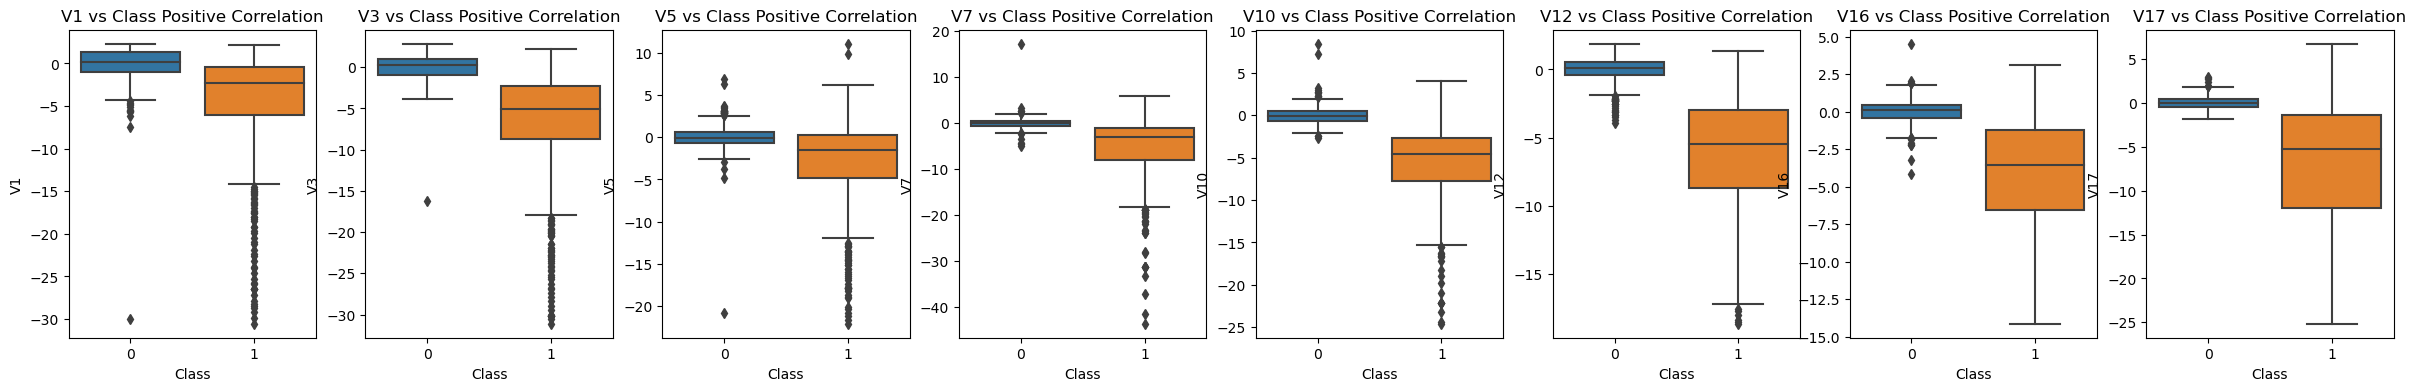

In [20]:
 f, axes = plt.subplots(ncols=8, figsize=(30, 4))

# Positive Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V1", data=new_df, ax=axes[0])
axes[0].set_title('V1 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V3", data=new_df, ax=axes[1])
axes[1].set_title('V3 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V5", data=new_df, ax=axes[2])
axes[2].set_title('V5 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V7", data=new_df, ax=axes[3])
axes[3].set_title('V7 vs Class Positive Correlation')

# Additional Boxplots
sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[4])
axes[4].set_title('V10 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[5])
axes[5].set_title('V12 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V16", data=new_df, ax=axes[6])
axes[6].set_title('V16 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[7])
axes[7].set_title('V17 vs Class Positive Correlation')

plt.show()

#### Anomaly Detection:
To remove data points that are outliers from features that are closely related to our target variables. This will improve the accuracy of our models by ensuring that they are not influenced by these outliers.

#### **Interquartile Range Method:**
**Interquartile Range (IQR)**: We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.<br>
**Boxplots**: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme)

##### **Removal Tradeoff**:
When removing outliers, it's crucial to consider the tradeoff between the threshold used and the number of outliers detected. The threshold is typically determined by multiplying a value (e.g., 1.5 or 3) by the interquartile range (IQR). The higher the threshold, the fewer outliers are detected, and the lower the threshold, the more outliers are detected.

**Considerations**:

* **Higher Threshold**: Using a higher threshold (e.g., multiplying by 3) detects fewer outliers, focusing on extreme values. However, it may lead to the removal of potentially valuable information.
* **Lower Threshold**: Using a lower threshold (e.g., multiplying by 1.5) detects more outliers, capturing a wider range of potentially anomalous data points. However, it risks removing valid data points that exhibit variation or noise.

**Finding Balance:**<br>
Striking a balance between outlier detection and data preservation is crucial. The choice of threshold depends on the context, data characteristics, and analysis goals. Experimentation and domain knowledge may be required to determine an appropriate threshold that captures meaningful outliers without excessively removing valid data points.

**Consider Impact**:<br>
Evaluate the impact of outlier removal on statistical measures, distributions, and subsequent analysis. Be cautious of the tradeoff between outlier detection and data loss in your specific analysis scenario.

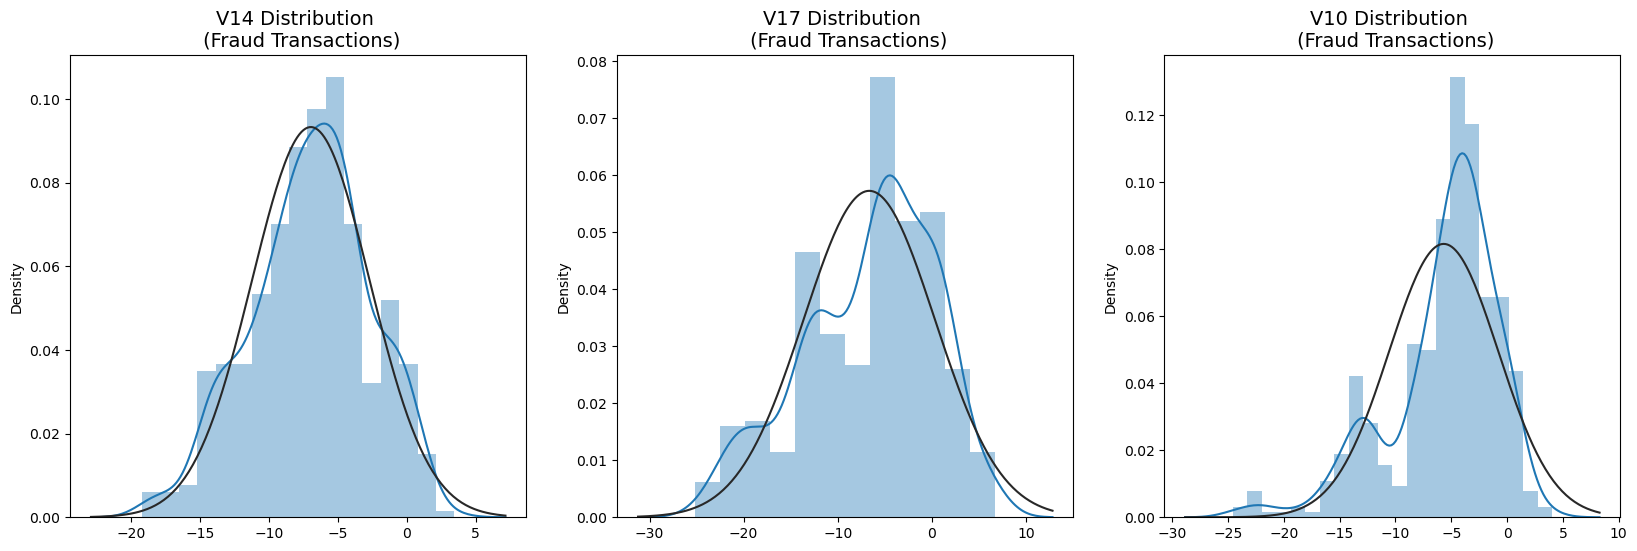

In [21]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm)
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v17_fraud_dist = new_df['V17'].loc[new_df['Class'] == 1].values
sns.distplot(v17_fraud_dist,ax=ax2, fit=norm)
ax2.set_title('V17 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm)
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [22]:
# V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values

# Calculate the quartiles and interquartile range (IQR) for V14 values of fraud cases
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25

# Determine the cutoff values for outliers using 1.5 times the IQR
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off

# Identify the outliers for V14 in fraud cases
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]

# Print the number of V14 outliers for fraud cases and the outlier values
print('Number of V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 Outliers: {}'.format(outliers))

# Remove the outliers from the DataFrame
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# V12 Removing Outliers from Fraud Transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values

# Calculate the quartiles and IQR for V12 values of fraud cases
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

# Determine the cutoff values for outliers using 1.5 times the IQR
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off

# Identify the outliers for V12 in fraud cases
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]

# Print the number of V12 outliers for fraud cases and the outlier values
print('V12 Outliers: {}'.format(outliers))
print('Number of V12 Outliers for Fraud Cases: {}'.format(len(outliers)))

# Remove the outliers from the DataFrame
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after Outliers Removal: {}'.format(len(new_df)))
print('----' * 44)

# Removing Outliers from V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values

# Calculate the quartiles and IQR for V10 values of fraud cases
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

# Determine the cutoff values for outliers using 1.5 times the IQR
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off

# Identify the outliers for V10 in fraud cases
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]

# Print the number of V10 outliers for fraud cases and the outlier values
print('V10 Outliers: {}'.format(outliers))
print('Number of V10 Outliers for Fraud Cases: {}'.format(len(outliers)))

# Remove the outliers from the DataFrame
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after Outliers Removal: {}'.format(len(new_df)))
print('----' * 44)

# Removing Outliers from V17 Feature
v17_fraud = new_df['V17'].loc[new_df['Class'] == 1].values

# Calculate the quartiles and IQR for V17 values of fraud cases
q25, q75 = np.percentile(v17_fraud, 25), np.percentile(v17_fraud, 75)
v17_iqr = q75 - q25

# Determine the cutoff values for outliers using 1.5 times the IQR
v17_cut_off = v17_iqr * 1.5
v17_lower, v17_upper = q25 - v17_cut_off, q75 + v17_cut_off

# Identify the outliers for V17 in fraud cases
outliers = [x for x in v17_fraud if x < v17_lower or x > v17_upper]

# Print the number of V17 outliers for fraud cases and the outlier values
print('V17 Outliers: {}'.format(outliers))
print('Number of V17 Outliers for Fraud Cases: {}'.format(len(outliers)))

# Remove the outliers from the DataFrame
new_df = new_df.drop(new_df[(new_df['V17'] > v17_upper) | (new_df['V17'] < v17_lower)].index)
print('Number of Instances after Outliers Removal: {}'.format(len(new_df)))
print('----' * 44)

# Removing Outliers from V16 Feature
v16_fraud = new_df['V16'].loc[new_df['Class'] == 1].values

# Calculate the quartiles and IQR for V16 values of fraud cases
q25, q75 = np.percentile(v16_fraud, 25), np.percentile(v16_fraud, 75)
v16_iqr = q75 - q25

# Determine the cutoff values for outliers using 1.5 times the IQR
v16_cut_off = v16_iqr * 1.5
v16_lower, v16_upper = q25 - v16_cut_off, q75 + v16_cut_off

# Identify the outliers for V16 in fraud cases
outliers = [x for x in v16_fraud if x < v16_lower or x > v16_upper]

# Print the number of V16 outliers for fraud cases and the outlier values
print('V16 Outliers: {}'.format(outliers))
print('Number of V16 Outliers for Fraud Cases: {}'.format(len(outliers)))

# Remove the outliers from the DataFrame
new_df = new_df.drop(new_df[(new_df['V16'] > v16_upper) | (new_df['V16'] < v16_lower)].index)
print('Number of Instances after Outliers Removal: {}'.format(len(new_df)))
print('----' * 44)

Number of V14 Outliers for Fraud Cases: 4
V14 Outliers: [-19.2143254902614, -18.0499976898594, -18.4937733551053, -18.8220867423816]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Outliers: [-18.6837146333443, -18.5536970096458, -18.0475965708216, -18.4311310279993]
Number of V12 Outliers for Fraud Cases: 4
Number of Instances after Outliers Removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Outliers: [-15.5637913387301, -22.1870885620007, -24.4031849699728, -15.2399619587112, -16.3035376590131, -15.5637913387301, -18.9132433348732, -15.1241628144947, -22.1870885620007, -16.6496281595399, -22.1870885620007, -16.7460441053944, -16.6011969664137, -17.1415136412892, -18.2711681738888, -16.2556117491401, -15.123752180

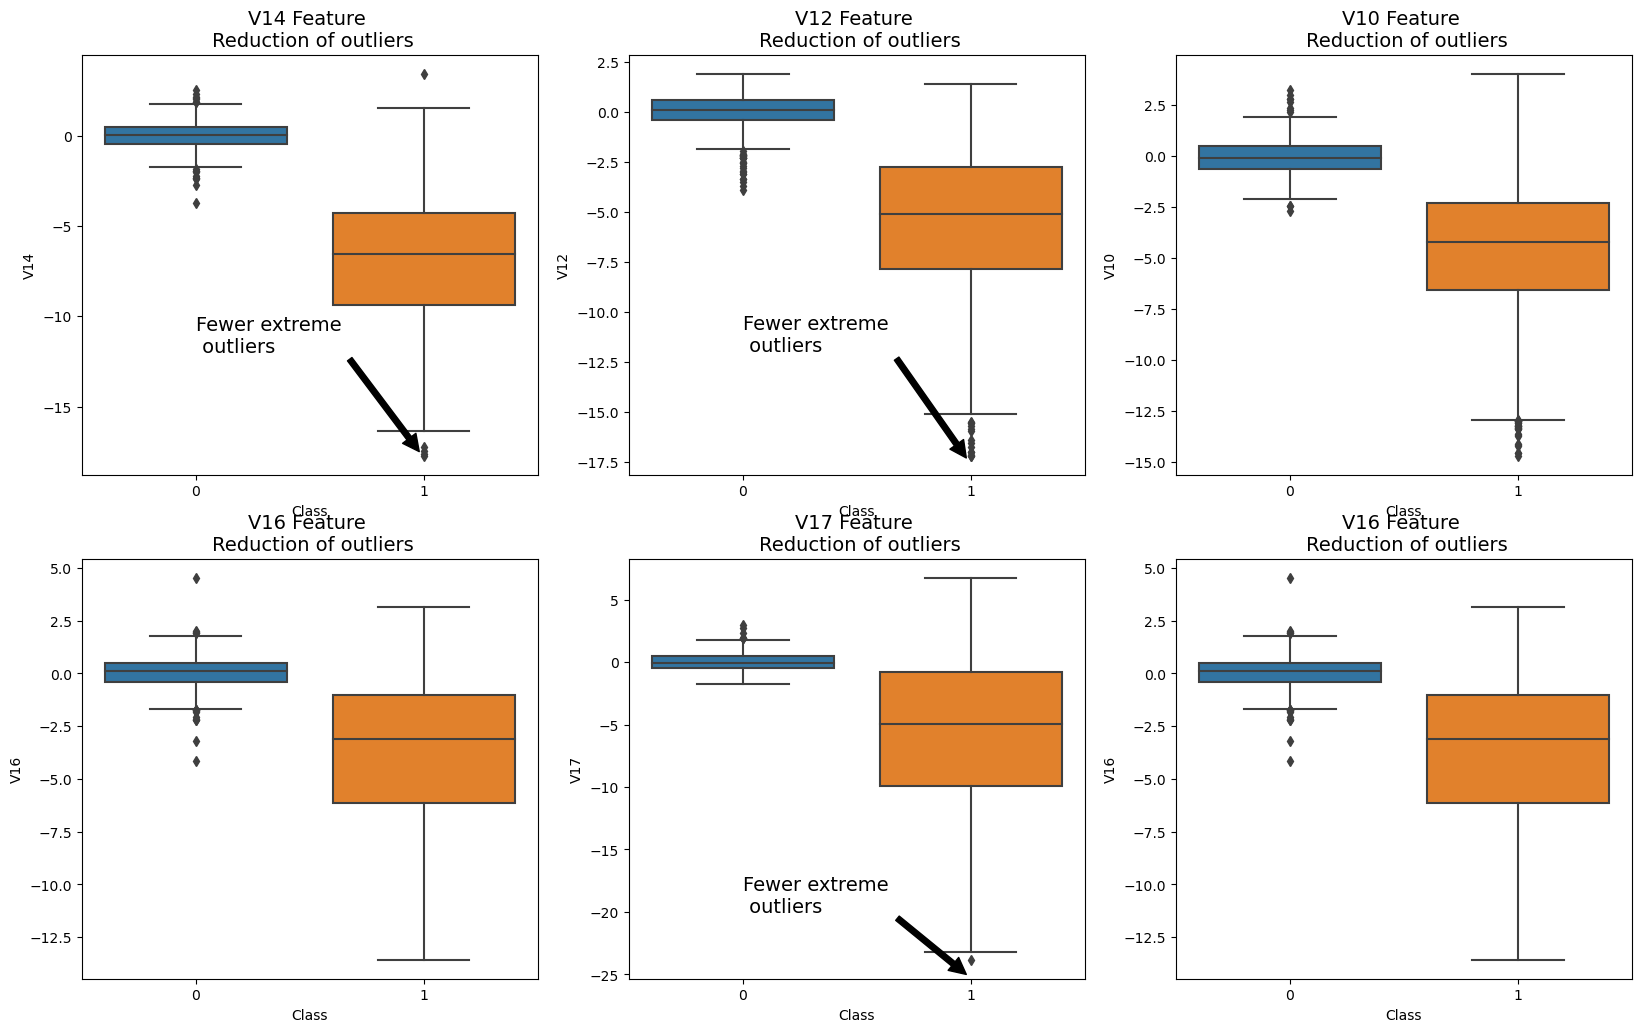

In [23]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 12))

# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df, ax=ax1)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V16
sns.boxplot(x="Class", y="V16", data=new_df, ax=ax4)
ax4.set_title("V16 Feature \n Reduction of outliers", fontsize=14)
ax4.annotate('Fewer extreme \n outliers', xy=(0.95, -30), xytext=(0, -25),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V17
sns.boxplot(x="Class", y="V17", data=new_df, ax=ax5)
ax5.set_title("V17 Feature \n Reduction of outliers", fontsize=14)
ax5.annotate('Fewer extreme \n outliers', xy=(0.98, -25), xytext=(0, -20),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V16
sns.boxplot(x="Class", y="V16", data=new_df, ax=ax6)
ax6.set_title("V16 Feature \n Reduction of outliers", fontsize=14)
ax6.annotate('Fewer extreme \n outliers', xy=(0.95, -30), xytext=(0, -25),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

plt.show()


#### **Dimensionality Reduction and Clustering:** 
<br>**Understanding t-SNE**

* **t-SNE Algorithm**: t-SNE is an algorithm that effectively clusters fraud and non-fraud cases in our dataset.
* **Key Concepts**: To comprehend the algorithm, it is essential to understand concepts such as Euclidean Distance, Conditional Probability, and Normal and T-Distribution Plots.
* **Additional Resource**: For a simplified and instructive video explanation, consider watching "StatQuest: t-SNE, Clearly Explained" by Joshua Starmer.
* **Accurate Clustering**: Despite the small size of our subsample, the t-SNE algorithm accurately identifies clusters in various scenarios, even after shuffling the dataset.
* **Promising Results**: The accurate clustering suggests that further predictive models will likely perform well in distinguishing fraud cases from non-fraud cases.

In [24]:
# Prepare the data
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# t-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("t-SNE took {:.2f} seconds".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2f} seconds".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2f} seconds".format(t1 - t0))

t-SNE took 5.58 seconds
PCA took 0.05 seconds
Truncated SVD took 0.02 seconds


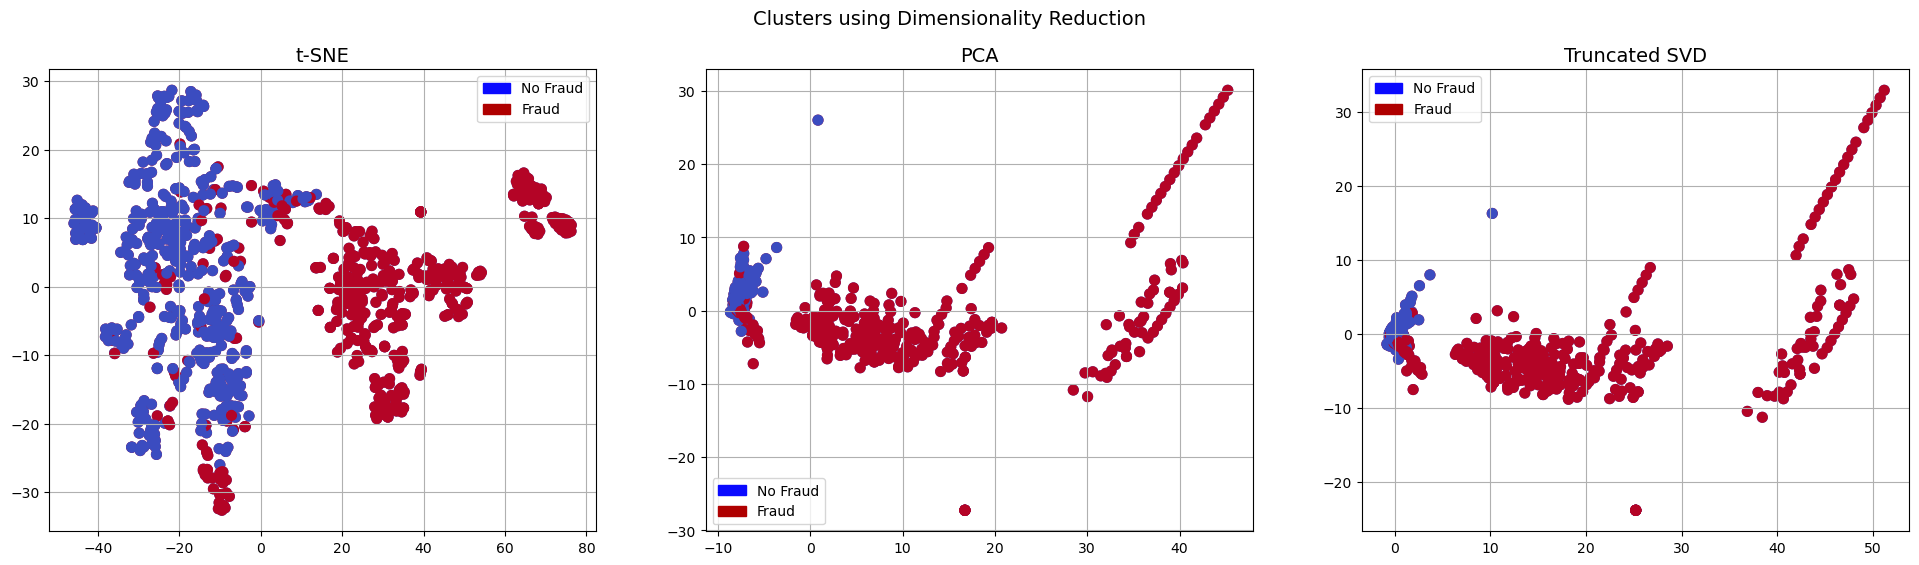

In [25]:
# Create a figure with 3 subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

# Set the title of the figure
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

# Define color patches for the legend
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

# Display the plot
plt.show()

<h2>Classifiers for UnderSampling</h2>
<a id="classifiers"></a>
We will train four different types of classifiers and compare their effectiveness in detecting fraud transactions. Before that, we need to split our data into training and testing sets and separate the features from the labels.

Summary:
<ul>
<li>The <b>Logistic Regression</b> classifier generally outperforms the other three classifiers in terms of accuracy. We will further analyze the Logistic Regression model.</li>
<li><b>GridSearchCV</b> is used to find the best parameter values for the classifiers, optimizing their predictive performance.</li>
<li>The Logistic Regression model has the highest Receiving Operating Characteristic (ROC) score, indicating its ability to accurately separate fraud and non-fraud transactions.</li>
</ul>

### Learning Curves:
<li>A wider gap between the training score and the cross-validation score suggests that the model may be overfitting (high variance).</li>
<li>If the scores are low in both the training and cross-validation sets, it indicates that the model may be underfitting (high bias).</li>
<li>The Logistic Regression classifier demonstrates the highest scores in both the training and cross-validation sets.</li>
</ul>

In [26]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [27]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [29]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [30]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score


In [31]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [32]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.3%
Knears Neighbors Cross Validation Score 94.04%
Support Vector Classifier Cross Validation Score 93.51%
DecisionTree Classifier Cross Validation Score 93.38%


In [33]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [265500 180241  42621 ...  29016  13731  17623] Test: [262997  11349 147250 ... 274523 269803  64112]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [34]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

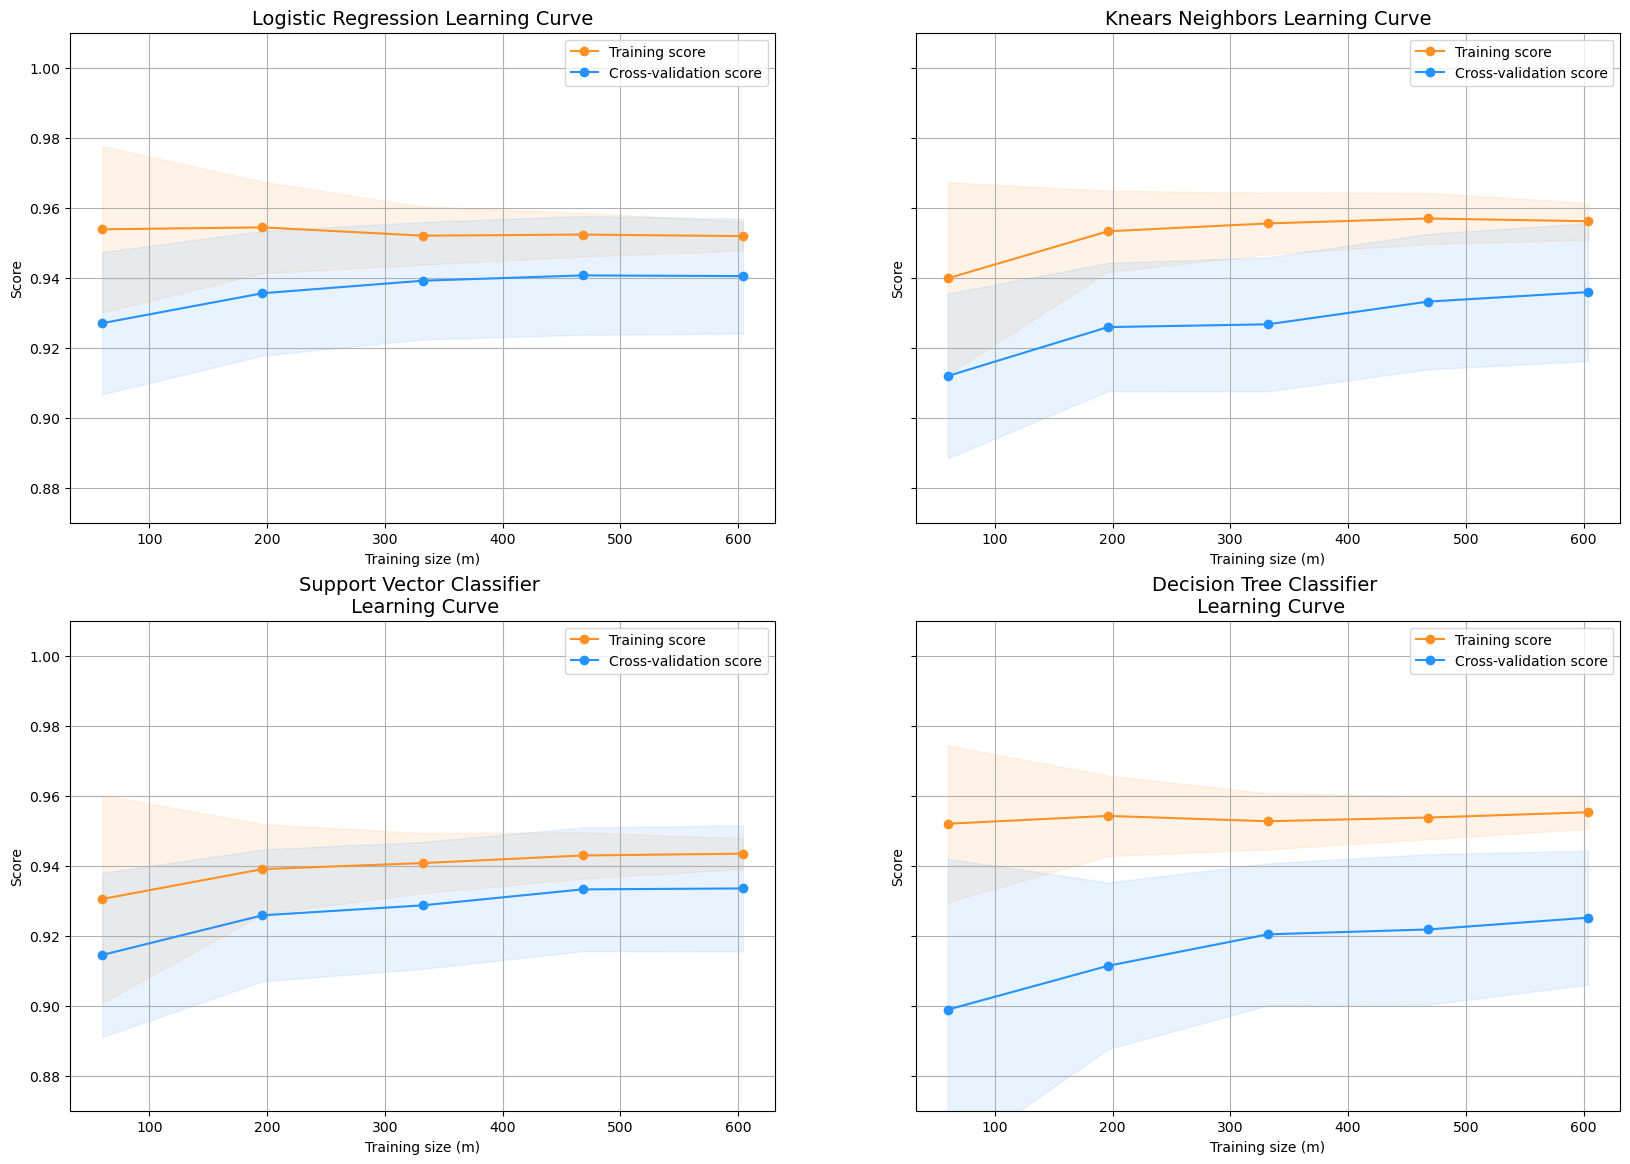

In [35]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [36]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [37]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9765956549844018
KNears Neighbors:  0.9391353531379106
Support Vector Classifier:  0.9790056490823754
Decision Tree Classifier:  0.9315575728619206


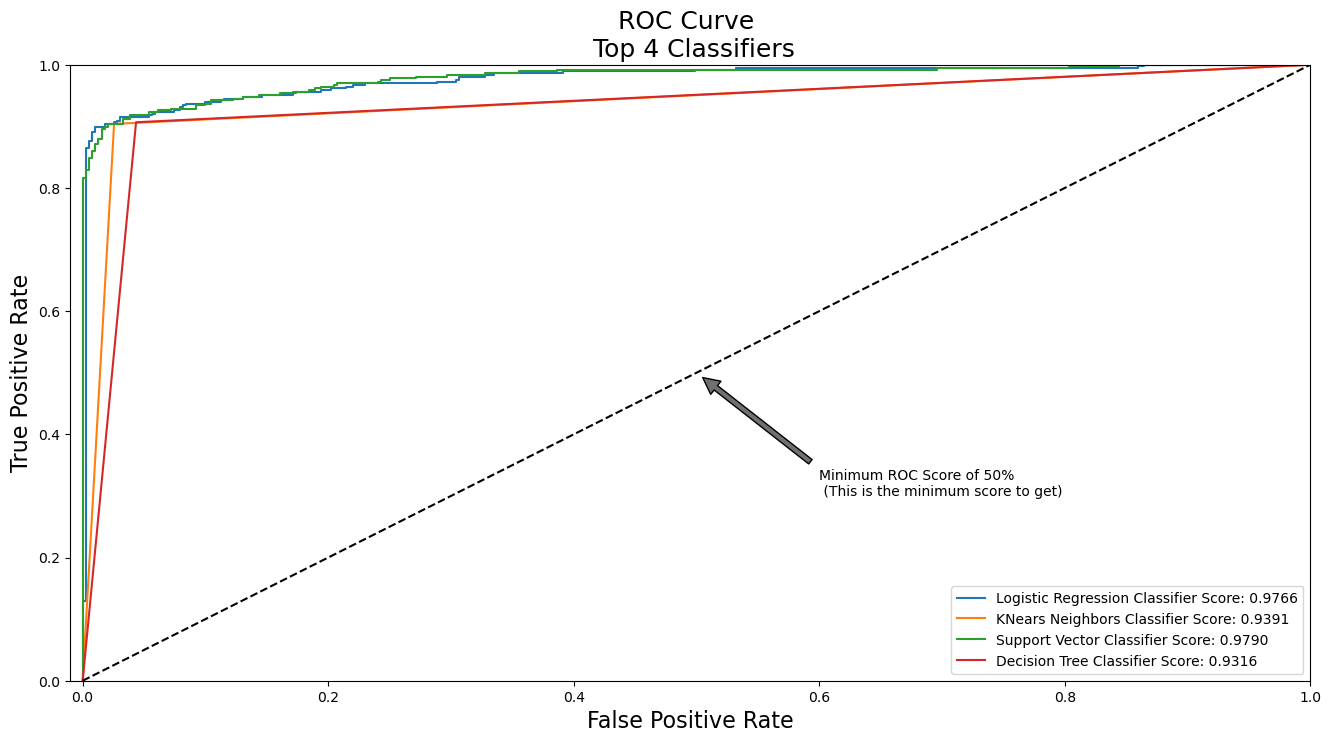

In [38]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()


#### Exploring Logistic Regression in Depth
<a id="logistic"></a>

This section delves deeper into the logistic regression classifier and its evaluation metrics.

**Key Terms:**
* **True Positives**: The number of correctly classified fraud transactions.
* **False Positives**: The number of incorrectly classified fraud transactions.
* **True Negatives**: The number of correctly classified non-fraud transactions.
* **False Negatives**: The number of incorrectly classified non-fraud transactions.
* **Precision**: The proportion of true positives out of all predicted positives (true positives + false positives).
* **Recall**: The proportion of true positives out of all actual positives (true positives + false negatives). Precision represents the model's confidence in detecting fraud transactions, while recall represents the model's ability to detect actual fraud cases.
* **Precision/Recall Tradeoff**: Increasing precision makes the model more selective and detects fewer cases, while lowering the precision allows the model to detect more cases.<br><br>
#### **Summary**:
The precision score starts to decrease around 0.90 to 0.92, but it still remains relatively high while maintaining a decent recall score.

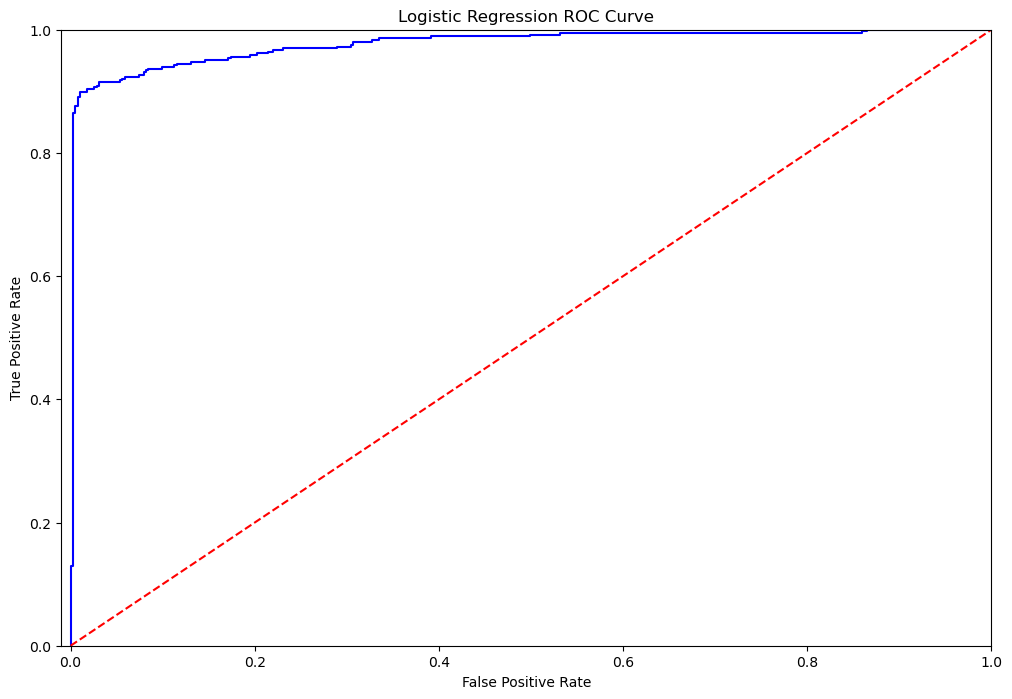

In [39]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve')
    plt.plot(log_fpr, log_tpr, 'b-')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [40]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [41]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.95
Precision Score: 0.78
F1 Score: 0.86
Accuracy Score: 0.85
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.72
Precision Score: 0.00
Recall Score: 0.32
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [42]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [43]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.05


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.05')

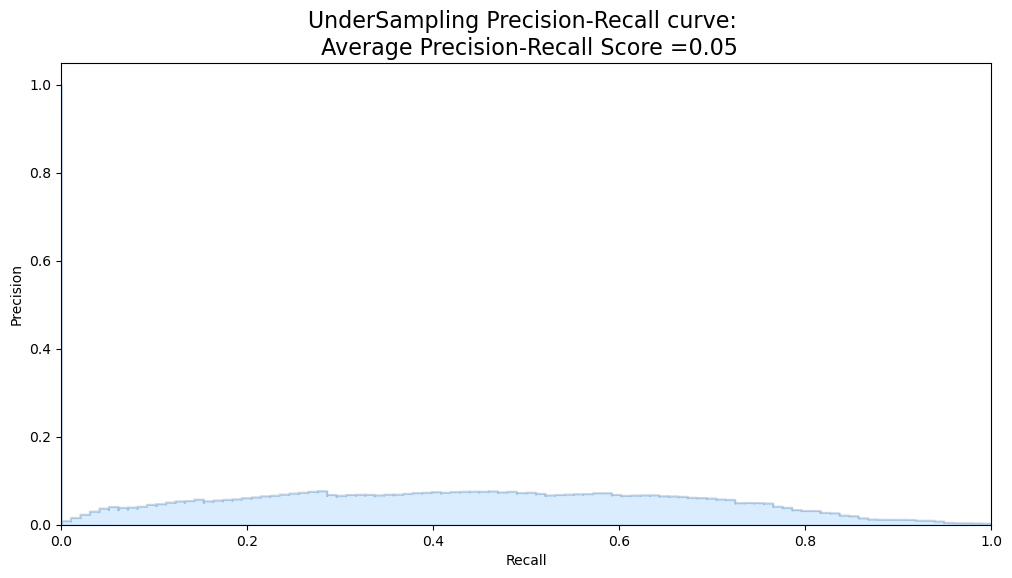

In [44]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)


#### SMOTE Technique (Over-Sampling):
# <img src="https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png" width="800">
<b>SMOTE</b> (Synthetic Minority Over-sampling Technique) is an over-sampling technique used to address class imbalance problems. Unlike random undersampling, SMOTE generates synthetic points to achieve a balanced representation of the classes.
Understanding SMOTE:

* **Solving the Class Imbalance**: SMOTE creates synthetic points from the minority class to achieve balance between minority and majority classes.
* **Location of the Synthetic Points**: SMOTE selects the distance between the closest neighbors of the minority class to create synthetic points.
* **Final Effect**: SMOTE retains more information as it doesn't delete any rows like random undersampling.
* **Accuracy vs Time Tradeoff**: SMOTE is likely to be more accurate than random undersampling but takes more time to train due to the absence of row elimination.
* **Cross Validation Overfitting Mistake**: In our undersample analysis, a common mistake is to perform undersampling or oversampling before cross-validation, which causes data leakage and overfitting. The correct approach is to generate synthetic data points during cross-validation, ensuring that the validation set remains untouched.

**References**:

* **SMOTE**: Synthetic Minority Over-sampling Technique by Nitesh V. Chawla, Kevin W. Bowyer, Lawrence O. Hall, and W. Philip Kegelmeyer.

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
with tf.device('/GPU:0'):

    print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
    print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

    # List to append the score and then find the average
    accuracy_lst = []
    precision_lst = []
    recall_lst = []
    f1_lst = []
    auc_lst = []

    # Classifier with optimal parameters
    # log_reg_sm = grid_log_reg.best_estimator_
    log_reg_sm = LogisticRegression()




    rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


    # Implementing SMOTE Technique 
    # Cross Validating the right way
    # Parameters
    log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    for train, test in sss.split(original_Xtrain, original_ytrain):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
        model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
        best_est = rand_log_reg.best_estimator_
        prediction = best_est.predict(original_Xtrain[test])

        accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
        precision_lst.append(precision_score(original_ytrain[test], prediction))
        recall_lst.append(recall_score(original_ytrain[test], prediction))
        f1_lst.append(f1_score(original_ytrain[test], prediction))
        auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

    print('---' * 45)
    print('')
    print("accuracy: {}".format(np.mean(accuracy_lst)))
    print("precision: {}".format(np.mean(precision_lst)))
    print("recall: {}".format(np.mean(recall_lst)))
    print("f1: {}".format(np.mean(f1_lst)))
    print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9760149220978714
precision: 0.06293103448275862
recall: 0.9240506329113924
f1: 0.11783696529459242
---------------------------------------------------------------------------------------------------------------------------------------


In [46]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.10      0.87      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961



In [47]:
y_score = best_est.decision_function(original_Xtest)

In [48]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.77


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.77')

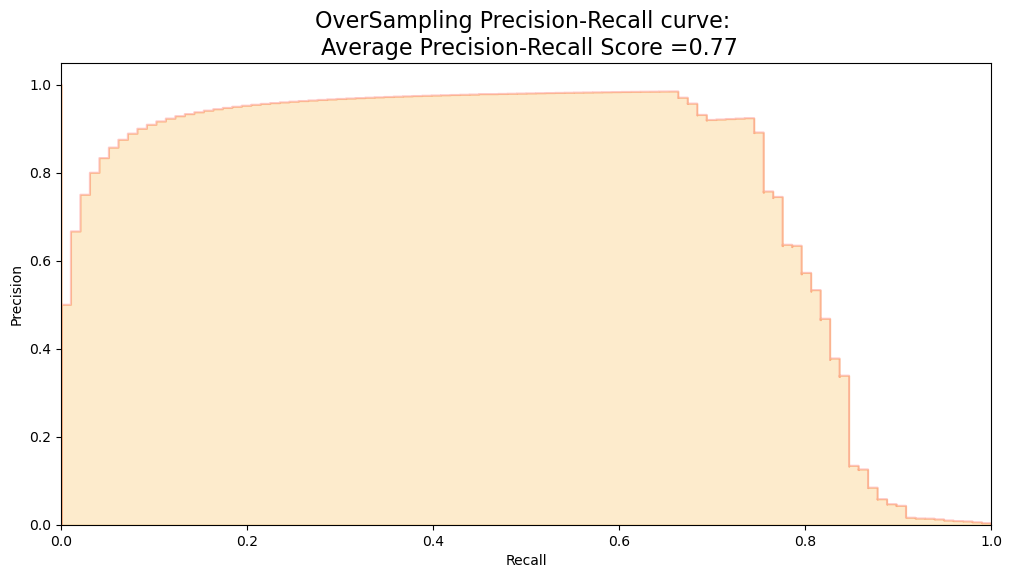

In [49]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [50]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [51]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :7.669809818267822 sec



##### Testing Logistic Regression on Test Data:
In this section, we will evaluate the performance of logistic regression on the test data. We will analyze the results using a confusion matrix, which provides information on the classification outcomes for both positive and negative classes.

* **True Negatives (Top-Left Square):** The number of correctly classified instances in the "No" class (No Fraud Detected).
* **False Negatives (Top-Right Square):** The number of incorrectly classified instances in the "No" class (No Fraud Detected).
* **False Positives (Bottom-Left Square):** The number of incorrectly classified instances in the "Yes" class (Fraud Detected).
* **True Positives (Bottom-Right Square):** The number of correctly classified instances in the "Yes" class (Fraud Detected).

**Summary:**

Random UnderSampling: We will assess the final performance of the classification models using the randomly undersampled subset. It's important to note that this data is not from the original dataframe.
Classification Models: The logistic regression and support vector classifier (SVM) models yielded the best performance among the evaluated models.

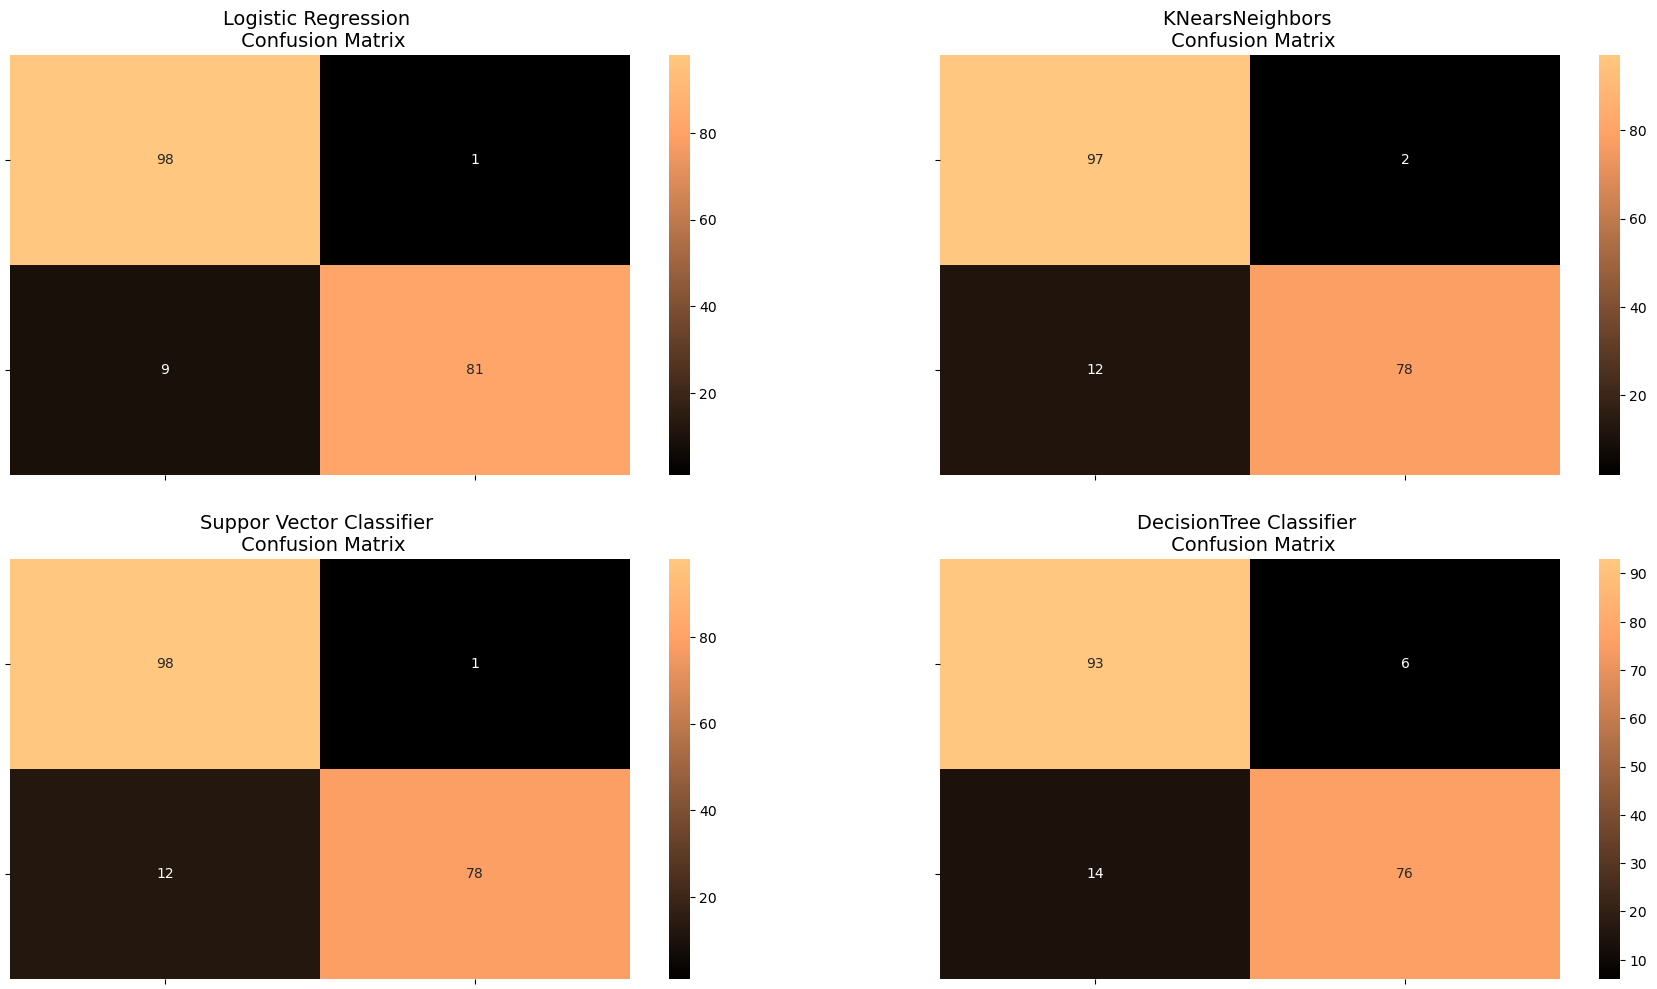

In [52]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [53]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        99
           1       0.99      0.90      0.94        90

    accuracy                           0.95       189
   macro avg       0.95      0.94      0.95       189
weighted avg       0.95      0.95      0.95       189

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.97      0.87      0.92        90

    accuracy                           0.93       189
   macro avg       0.93      0.92      0.93       189
weighted avg       0.93      0.93      0.93       189

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        99
           1       0.99      0.87      0.92        90

    accuracy                           0.93       189
   macro avg       0.94      0.93      0.93       189
weighted

In [54]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.94709
1,Oversampling (SMOTE),0.98599


#### **Comparing Neural Networks on Random Undersampling and Oversampling (SMOTE) Data:**
In this section, we will compare the performance of a simple Neural Network with one hidden layer on two different datasets: random undersampled data and oversampled data generated using the SMOTE (Synthetic Minority Over-sampling Technique) method. Our goal is to determine which approach, either undersampling or oversampling, yields better accuracy in detecting both fraud and non-fraud transactions. It is important to consider both categories as misclassifying non-fraud transactions can have negative consequences for cardholders. Therefore, our objective is to achieve accurate predictions for both fraud and non-fraud cases.

In [55]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [56]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [57]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
25/25 - 1s - loss: 0.8347 - accuracy: 0.6987 - val_loss: 0.4248 - val_accuracy: 0.8079 - 1s/epoch - 43ms/step
Epoch 2/20
25/25 - 0s - loss: 0.3646 - accuracy: 0.8526 - val_loss: 0.3501 - val_accuracy: 0.9139 - 105ms/epoch - 4ms/step
Epoch 3/20
25/25 - 0s - loss: 0.3003 - accuracy: 0.9172 - val_loss: 0.3045 - val_accuracy: 0.9139 - 132ms/epoch - 5ms/step
Epoch 4/20
25/25 - 0s - loss: 0.2641 - accuracy: 0.9288 - val_loss: 0.2667 - val_accuracy: 0.9205 - 101ms/epoch - 4ms/step
Epoch 5/20
25/25 - 0s - loss: 0.2358 - accuracy: 0.9421 - val_loss: 0.2362 - val_accuracy: 0.9272 - 100ms/epoch - 4ms/step
Epoch 6/20
25/25 - 0s - loss: 0.2146 - accuracy: 0.9421 - val_loss: 0.2149 - val_accuracy: 0.9470 - 95ms/epoch - 4ms/step
Epoch 7/20
25/25 - 0s - loss: 0.1973 - accuracy: 0.9437 - val_loss: 0.1955 - val_accuracy: 0.9536 - 107ms/epoch - 4ms/step
Epoch 8/20
25/25 - 0s - loss: 0.1823 - accuracy: 0.9454 - val_loss: 0.1796 - val_accuracy: 0.9536 - 102ms/epoch - 4ms/step
Epoch 9/20
25/25 - 

In [59]:
undersample_predictions = undersample_model.predict(original_Xtest)

1781/1781 [==============================] - 3s 2ms/step


In [60]:
undersample_fraud_probabilities = undersample_model.predict(original_Xtest)
undersample_fraud_predictions = np.argmax(undersample_fraud_probabilities, axis=1)


1781/1781 [==============================] - 3s 2ms/step


In [61]:
undersample_fraud_predictions[:]

array([1, 1, 1, ..., 0, 0, 0])

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [63]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Our model Performance
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy: 0.9753340004564527
Precision: 0.05933917734322319
Recall: 0.8979591836734694
F1 Score: 0.11132194813409235
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Ideal model Performance
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[55468  1395]
 [   10    88]]
Con

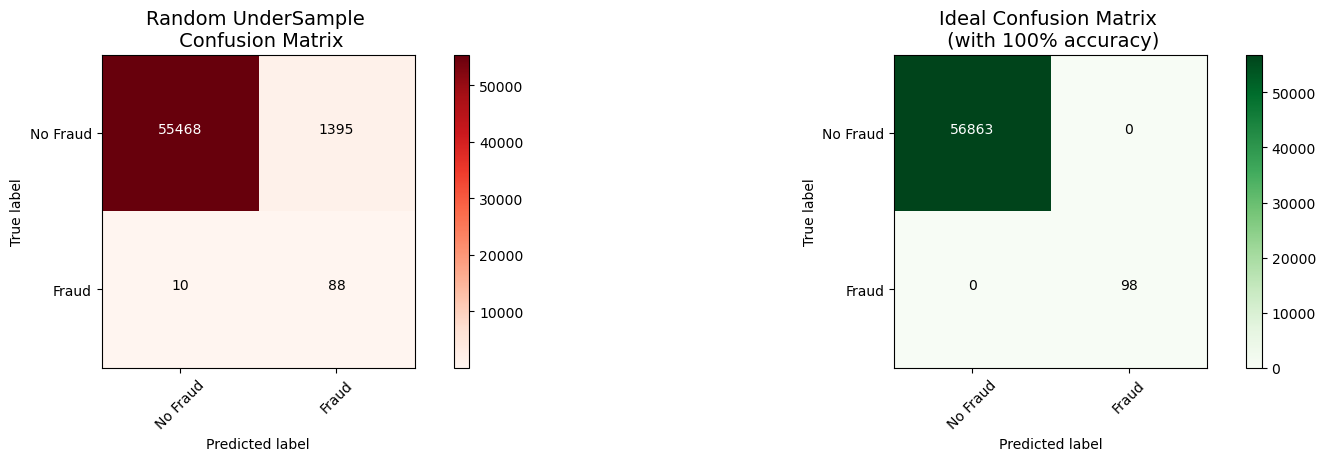

In [64]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
accuracy = accuracy_score(original_ytest, undersample_fraud_predictions)
precision = precision_score(original_ytest, undersample_fraud_predictions)
recall = recall_score(original_ytest, undersample_fraud_predictions)
f1 = f1_score(original_ytest, undersample_fraud_predictions)
labels = ['No Fraud', 'Fraud']
print("Our model Performance")
print('----' * 44)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('----' * 44)
# Calculate evaluation metrics
accuracy_ideal = accuracy_score(original_ytest, original_ytest)
precision_ideal = precision_score(original_ytest, original_ytest)
recall_ideal = recall_score(original_ytest, original_ytest)
f1_ideal = f1_score(original_ytest, original_ytest)
print("Ideal model Performance")
print('----' * 44)
print("Accuracy:", accuracy_ideal)
print("Precision:", precision_ideal)
print("Recall:", recall_ideal)
print("F1 Score:", f1_ideal)
print('----' * 44)
fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Ideal Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [65]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [66]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
with tf.device('/GPU:0'):
    oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 4s - loss: 0.0665 - accuracy: 0.9784 - val_loss: 0.0207 - val_accuracy: 0.9980 - 4s/epoch - 4ms/step
Epoch 2/20
1214/1214 - 4s - loss: 0.0115 - accuracy: 0.9974 - val_loss: 0.0067 - val_accuracy: 0.9997 - 4s/epoch - 3ms/step
Epoch 3/20
1214/1214 - 4s - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.0041 - val_accuracy: 0.9998 - 4s/epoch - 3ms/step
Epoch 4/20
1214/1214 - 5s - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0068 - val_accuracy: 0.9989 - 5s/epoch - 4ms/step
Epoch 5/20
1214/1214 - 4s - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0010 - val_accuracy: 1.0000 - 4s/epoch - 3ms/step
Epoch 6/20
1214/1214 - 4s - loss: 0.0030 - accuracy: 0.9993 - val_loss: 8.9869e-04 - val_accuracy: 1.0000 - 4s/epoch - 3ms/step
Epoch 7/20
1214/1214 - 4s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0090 - val_accuracy: 0.9974 - 4s/epoch - 3ms/step
Epoch 8/20
1214/1214 - 4s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 8.6127e-04 - val_accuracy: 1.0000 - 4s/epoch - 3ms/step


In [68]:
oversample_predictions = oversample_model.predict(original_Xtest)

1781/1781 [==============================] - 4s 2ms/step


In [69]:
oversample_fraud_predictions = np.argmax(oversample_predictions, axis=1)
oversample_fraud_predictions

array([0, 1, 0, ..., 0, 0, 0])

Our model Performance
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy: 0.9991573181650603
Precision: 0.7777777777777778
Recall: 0.7142857142857143
F1 Score: 0.7446808510638298
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Ideal model Performance
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[56843    20]
 [   28    70]]
Confu

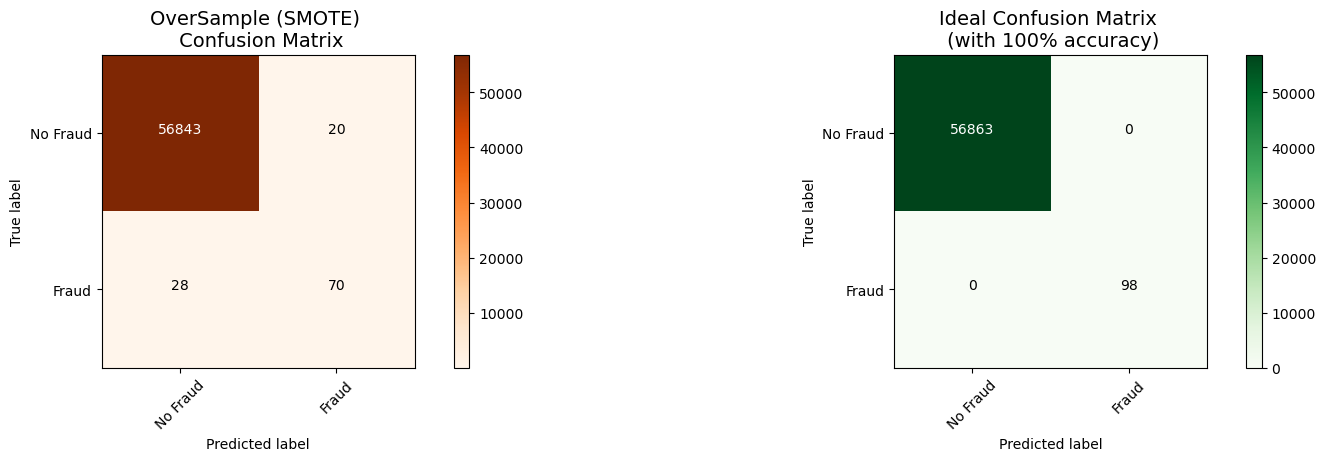

In [70]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))
# Calculate evaluation metrics
accuracy_smote = accuracy_score(original_ytest, oversample_fraud_predictions)
precision_smote = precision_score(original_ytest, oversample_fraud_predictions)
recall_smote = recall_score(original_ytest, oversample_fraud_predictions)
f1_smote = f1_score(original_ytest, oversample_fraud_predictions)
print("Our model Performance")
print('----' * 44)
print("Accuracy:", accuracy_smote)
print("Precision:", precision_smote)
print("Recall:", recall_smote)
print("F1 Score:", f1_smote)
print('----' * 44)
# Calculate evaluation metrics
accuracy_ideal = accuracy_score(original_ytest, original_ytest)
precision_ideal = precision_score(original_ytest, original_ytest)
recall_ideal = recall_score(original_ytest, original_ytest)
f1_ideal = f1_score(original_ytest, original_ytest)
print("Ideal model Performance")
print('----' * 44)
print("Accuracy:", accuracy_ideal)
print("Precision:", precision_ideal)
print("Recall:", recall_ideal)
print("F1 Score:", f1_ideal)
print('----' * 44)
fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Ideal Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [71]:
undersample_score = accuracy
oversample_score = accuracy_smote
d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Acc': [undersample_score, oversample_score],
    'Precesion': [precision, precision_smote],'Recall': [recall, recall_smote],'F-1':[f1, f1_smote]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Acc']
final_df.drop('Acc', axis=1, inplace=True)
final_df.insert(1, 'Acc', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Acc,Precesion,Recall,F-1
0,Random UnderSampling,0.975334,0.059339,0.897959,0.111322
1,Oversampling (SMOTE),0.999157,0.777778,0.714286,0.744681


### Conclusion:
* SMOTE helped to balance the imbalanced dataset, but the neural network on the oversampled dataset sometimes predicted less correct fraud transactions than the model using the undersampled dataset.
* The undersampled dataset was not able to detect a large number of non-fraud transactions correctly, and instead misclassified those transactions as fraud cases.
* This could be a disadvantage for the financial institution, as it could lead to customers having their cards blocked for regular purchases.
* The next step in the analysis will be to remove outliers from the oversampled dataset and see if the accuracy in the test set improves.